In [178]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [180]:
# Setting up some parameters for the workbook

pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (25,5)

In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Data**

In [182]:
# The path of folder for the project

folder_path = '/content/drive/MyDrive/LoanPrediction/'

In [183]:
loan = pd.read_csv(folder_path + 'loan_data.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [184]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


# **Data Cleaning**

In [185]:
loan.drop(['Loan_ID'],axis=1,inplace=True)

In [186]:
print("\nDuplicate rows before dropping:", loan.duplicated().sum())
loan.drop_duplicates(inplace=True)

print("\nShape after cleaning:", loan.shape)


Duplicate rows before dropping: 0

Shape after cleaning: (598, 12)


In [187]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Exploratory Data Analysis**

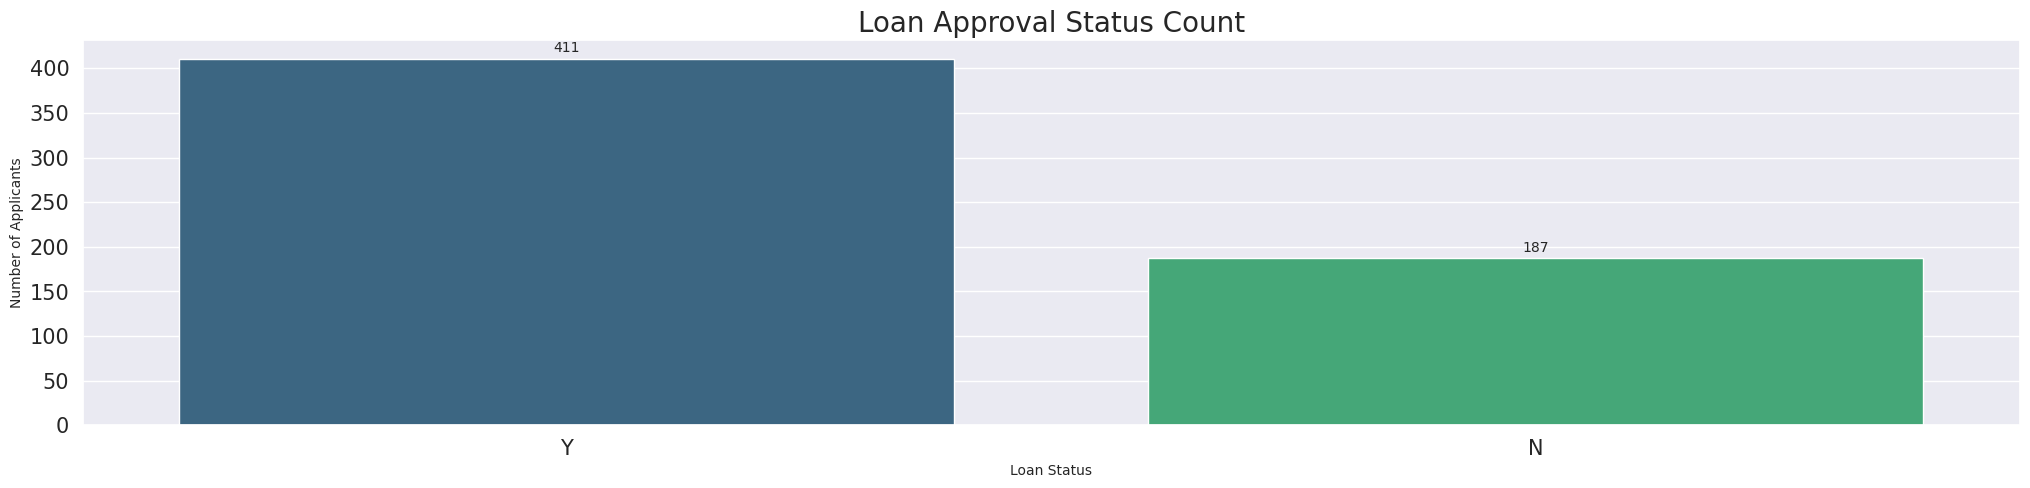

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

loan_status_count = loan['Loan_Status'].value_counts().reset_index()
loan_status_count.columns = ['Loan_Status', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=loan_status_count, x="Loan_Status", y="count", palette="viridis", ax=axes)

for i, row in loan_status_count.iterrows():
    axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Loan Approval Status Count", fontsize=20)
plt.xlabel("Loan Status", fontsize=10)
plt.ylabel("Number of Applicants", fontsize=10)

plt.show()

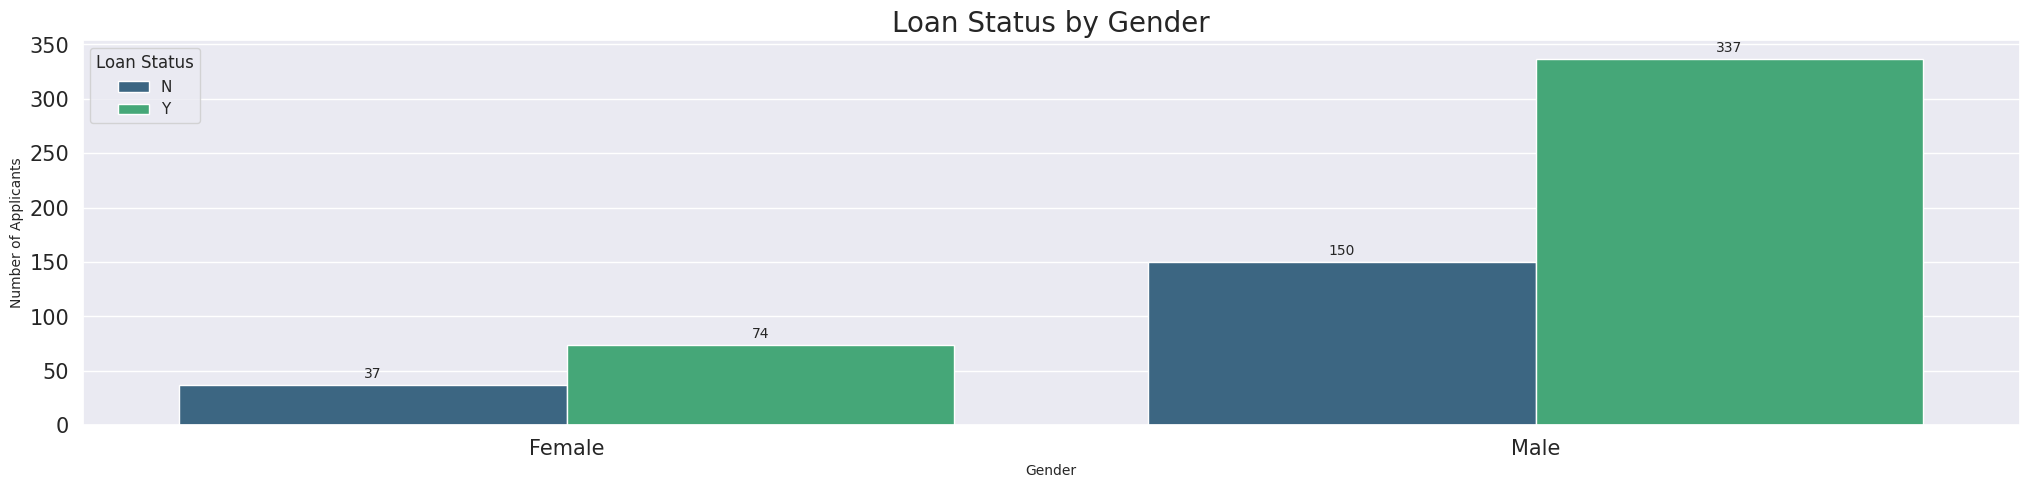

In [189]:
gender_loan = loan.groupby(['Gender', 'Loan_Status']).size().reset_index(name='count')

sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=gender_loan, x="Gender", y="count", hue="Loan_Status", palette="viridis", ax=axes)

for container in axes.containers:
    for bar in container:
        height = bar.get_height()
        axes.annotate(f"{int(height)}", (bar.get_x() + bar.get_width() / 2, height),
                      textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Loan Status by Gender", fontsize=20)
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Number of Applicants", fontsize=10)
plt.legend(title="Loan Status")

plt.show()

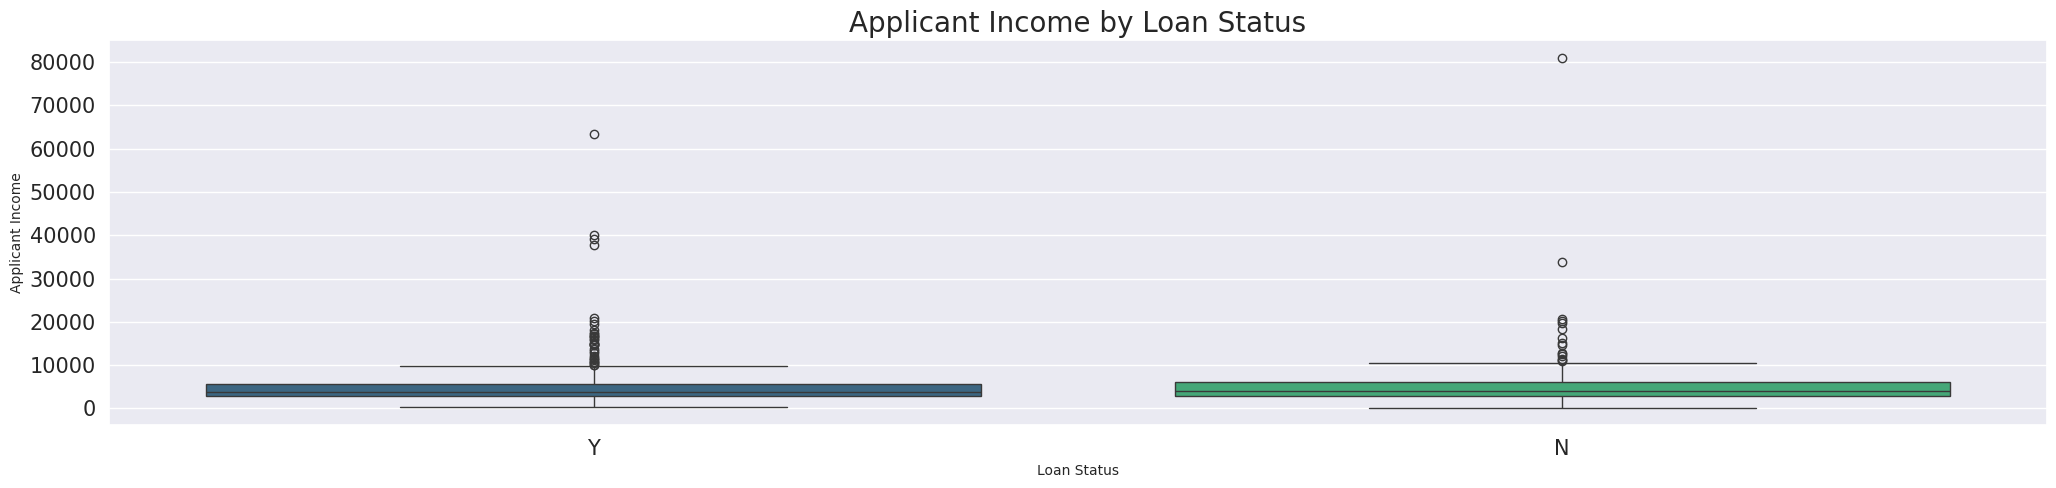

In [190]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.boxplot(data=loan, x="Loan_Status", y="ApplicantIncome", palette="viridis", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Applicant Income by Loan Status", fontsize=20)
plt.xlabel("Loan Status", fontsize=10)
plt.ylabel("Applicant Income", fontsize=10)

plt.show()

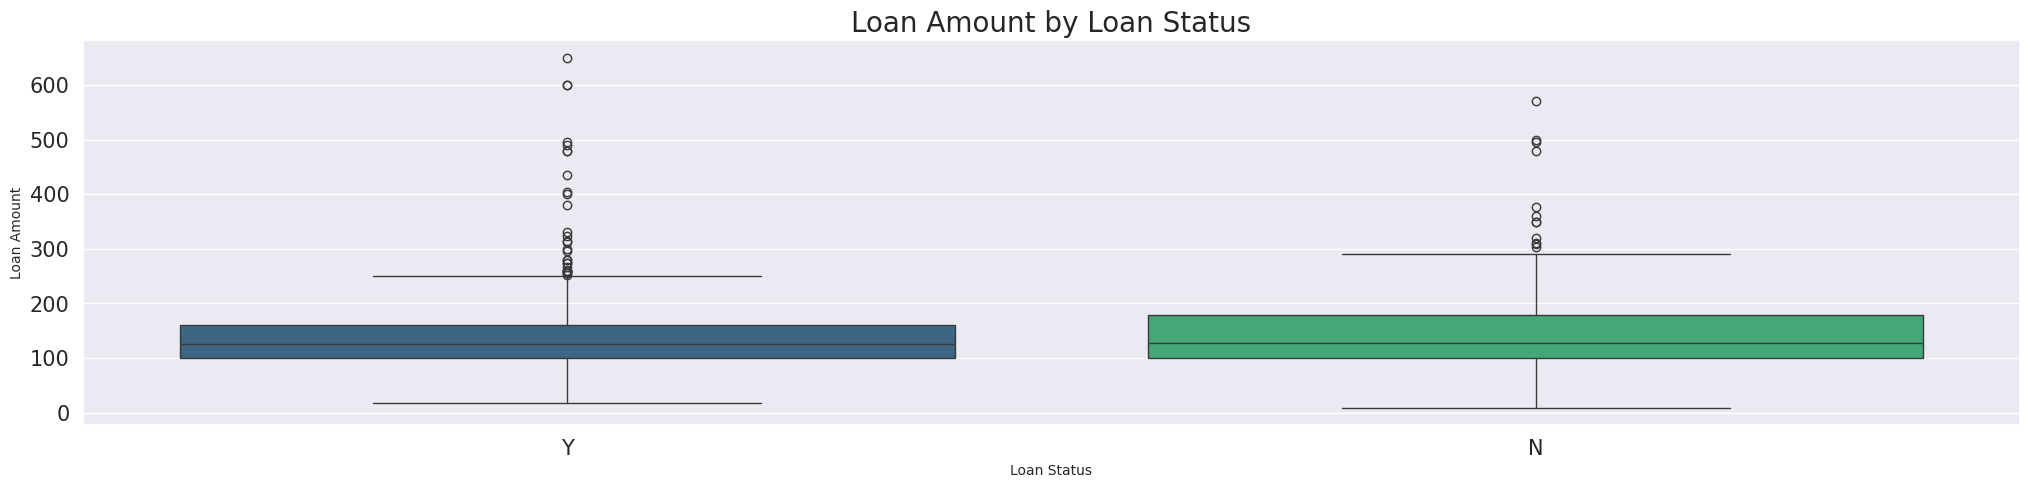

In [191]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.boxplot(data=loan, x="Loan_Status", y="LoanAmount", palette="viridis", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Loan Amount by Loan Status", fontsize=20)
plt.xlabel("Loan Status", fontsize=10)
plt.ylabel("Loan Amount", fontsize=10)

plt.show()

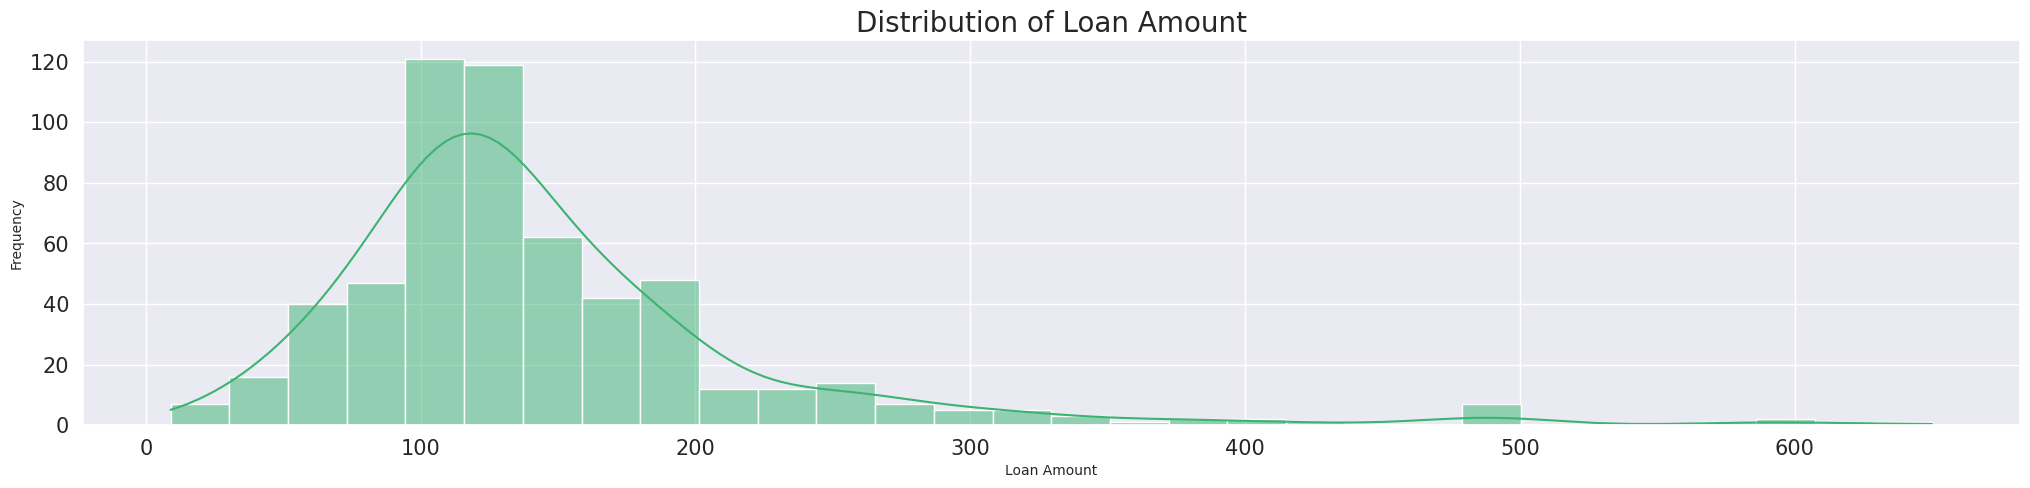

In [192]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.histplot(data=loan, x="LoanAmount", bins=30, kde=True, color="mediumseagreen", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of Loan Amount", fontsize=20)
plt.xlabel("Loan Amount", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

plt.show()

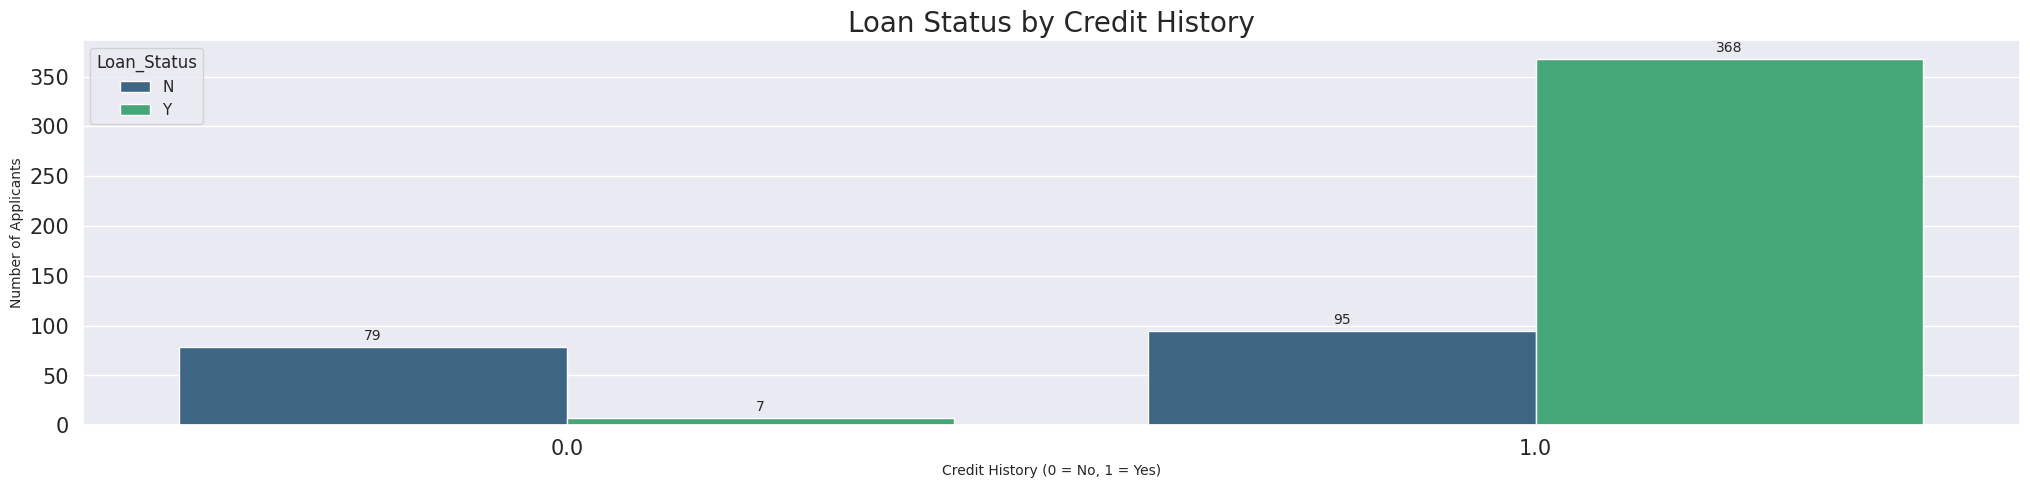

In [193]:
sns.set(style="darkgrid")

credit_history_loan = loan.groupby(['Credit_History', 'Loan_Status']).size().reset_index(name='count')

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=credit_history_loan, x="Credit_History", y="count", hue="Loan_Status", palette="viridis", ax=axes)

for container in axes.containers:
    for bar in container:
        height = bar.get_height()
        axes.annotate(f"{int(height)}", (bar.get_x() + bar.get_width() / 2, height),
                      textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Loan Status by Credit History", fontsize=20)
plt.xlabel("Credit History (0 = No, 1 = Yes)", fontsize=10)
plt.ylabel("Number of Applicants", fontsize=10)

plt.show()

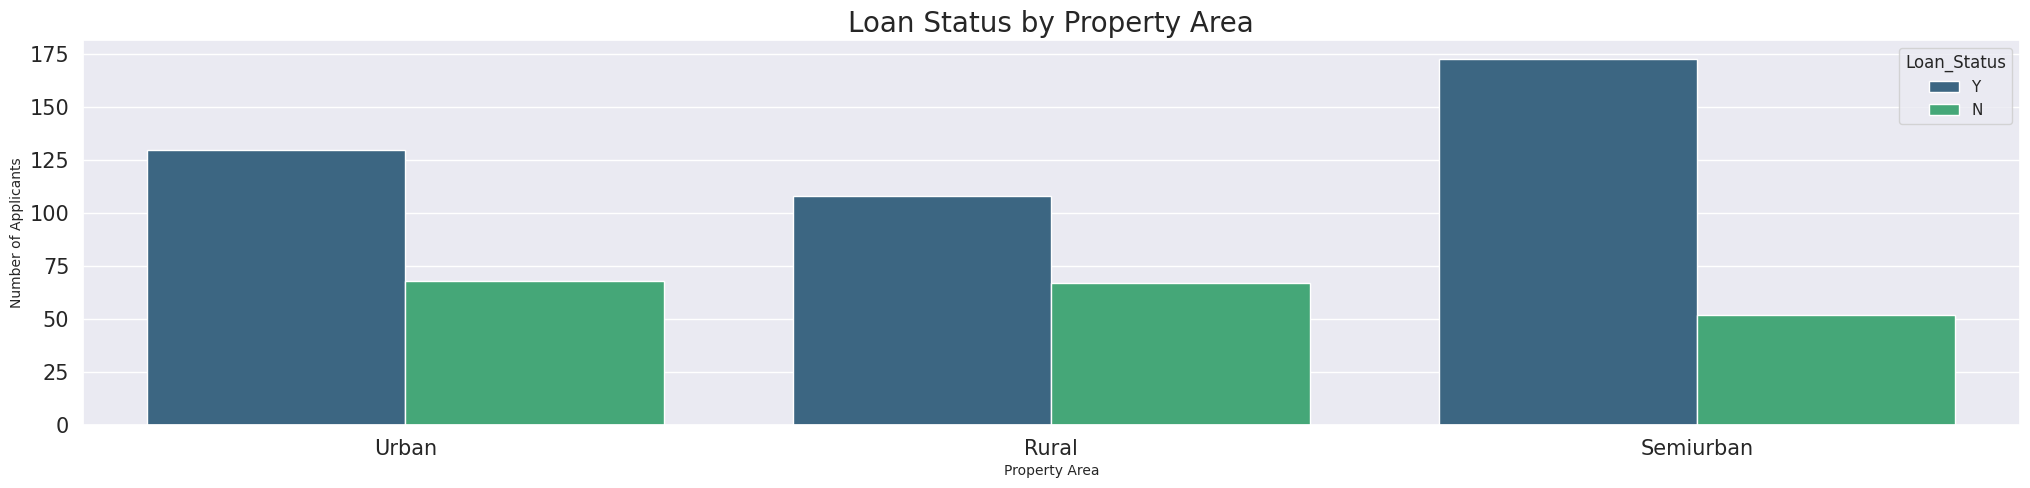

In [194]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.countplot(data=loan, x="Property_Area", hue="Loan_Status", palette="viridis", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Loan Status by Property Area", fontsize=20)
plt.xlabel("Property Area", fontsize=10)
plt.ylabel("Number of Applicants", fontsize=10)

plt.show()

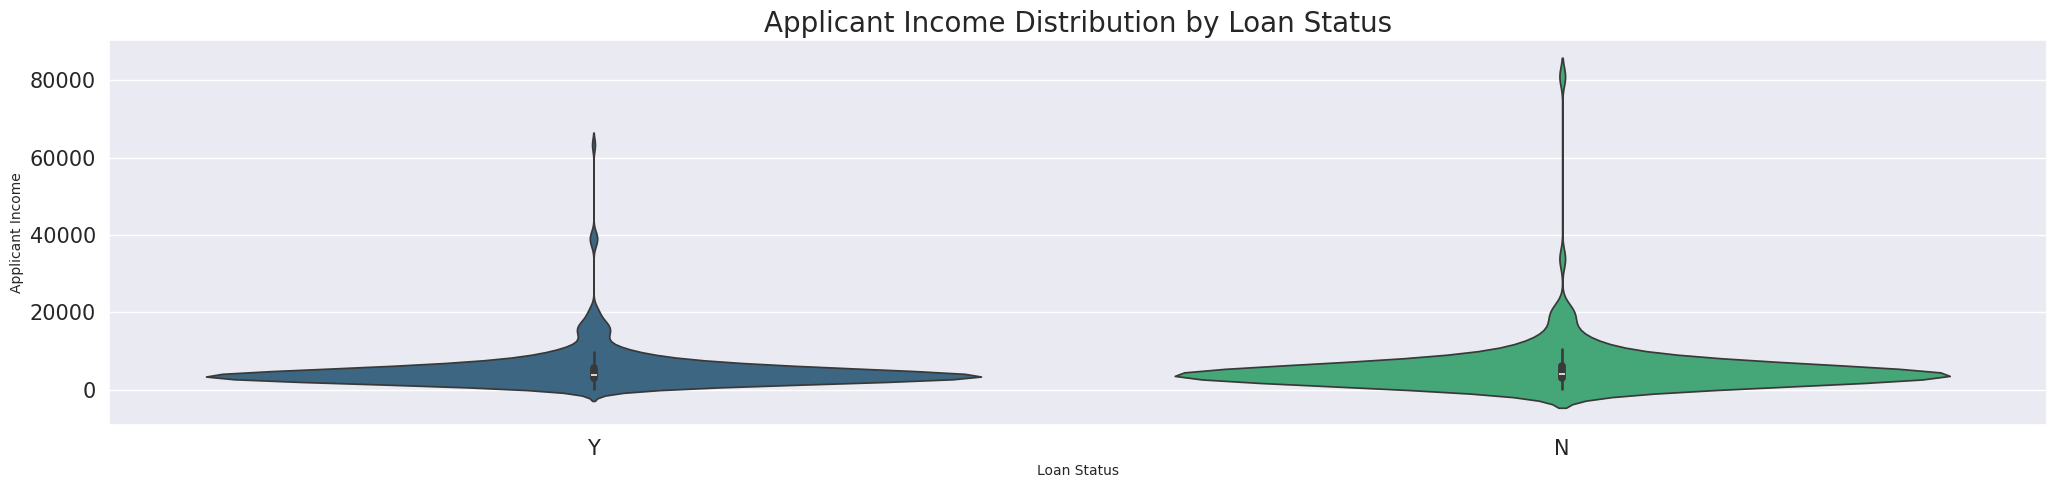

In [195]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.violinplot(data=loan, x="Loan_Status", y="ApplicantIncome", palette="viridis", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Applicant Income Distribution by Loan Status", fontsize=20)
plt.xlabel("Loan Status", fontsize=10)
plt.ylabel("Applicant Income", fontsize=10)

plt.show()

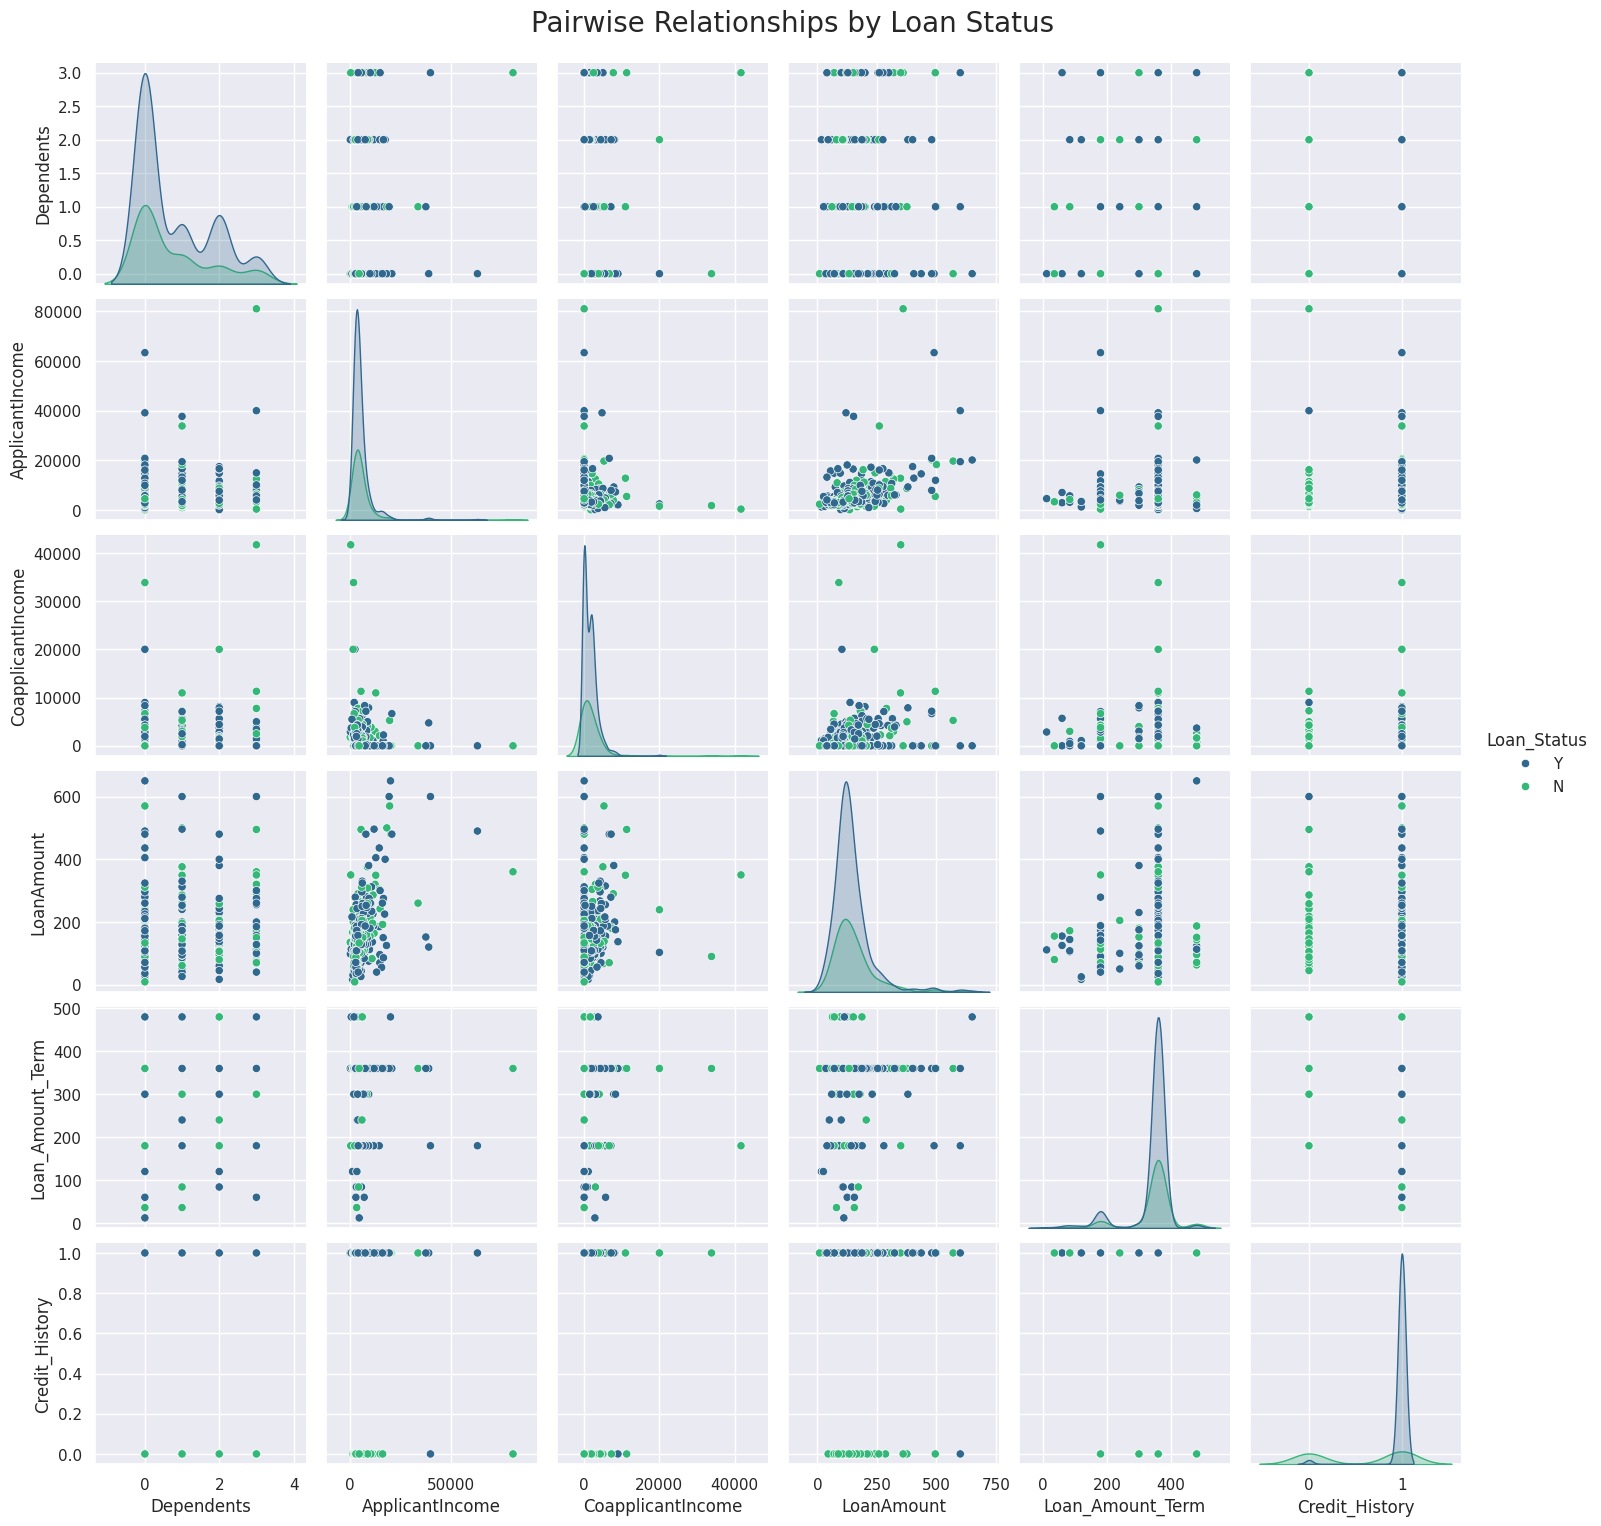

In [196]:
sns.set(style="darkgrid")

sns.pairplot(loan, hue="Loan_Status", palette="viridis", height=2.5)

plt.suptitle("Pairwise Relationships by Loan Status", fontsize=20, y=1.02)

plt.show()

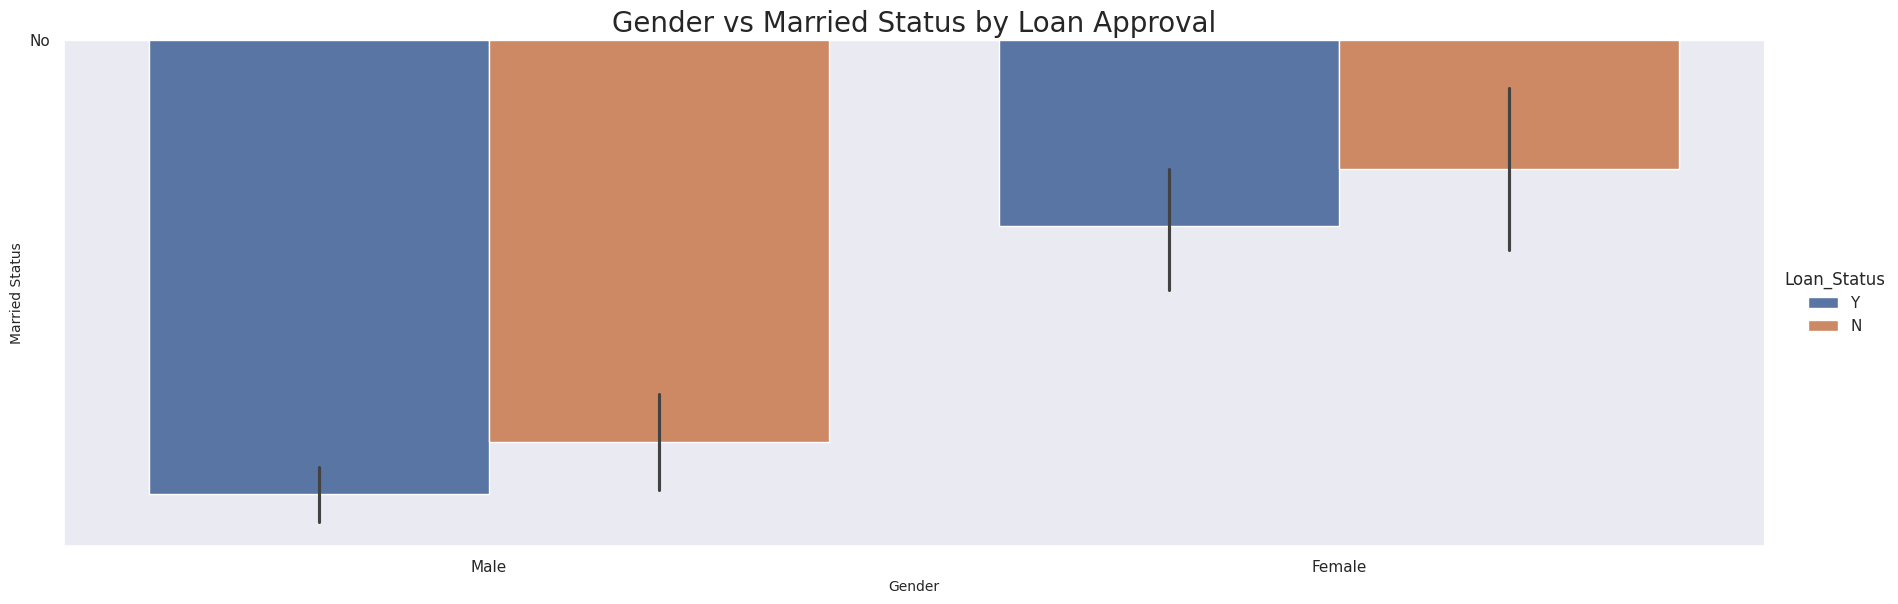

In [197]:
sns.set(style="darkgrid")

# Create a categorical plot (bar plot) for Gender vs Married by Loan_Status with specified figsize
sns.catplot(x="Gender", y="Married", hue="Loan_Status", kind="bar", data=loan, height=6, aspect=3.0)

plt.title("Gender vs Married Status by Loan Approval", fontsize=20)
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Married Status", fontsize=10)

plt.show()

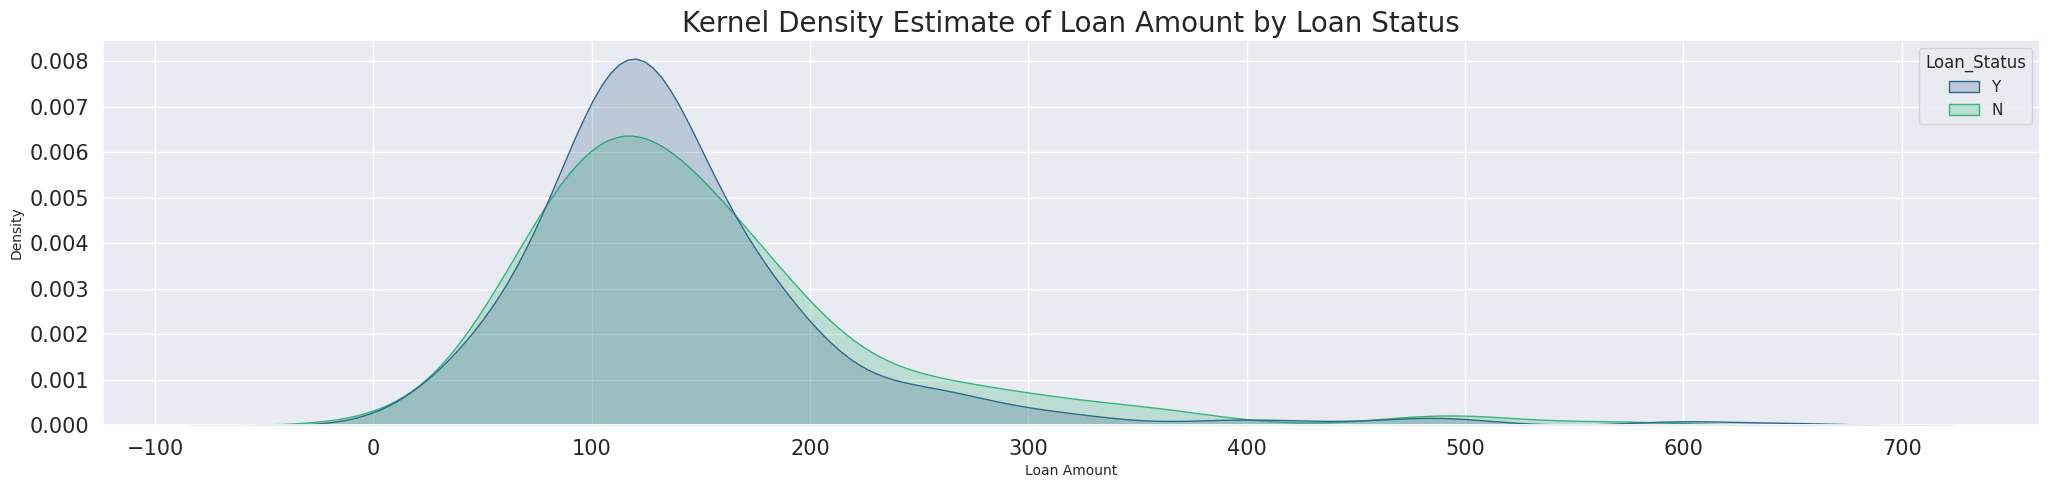

In [198]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.kdeplot(data=loan, x="LoanAmount", hue="Loan_Status", fill=True, common_norm=False, palette="viridis", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Kernel Density Estimate of Loan Amount by Loan Status", fontsize=20)
plt.xlabel("Loan Amount", fontsize=10)
plt.ylabel("Density", fontsize=10)

plt.show()

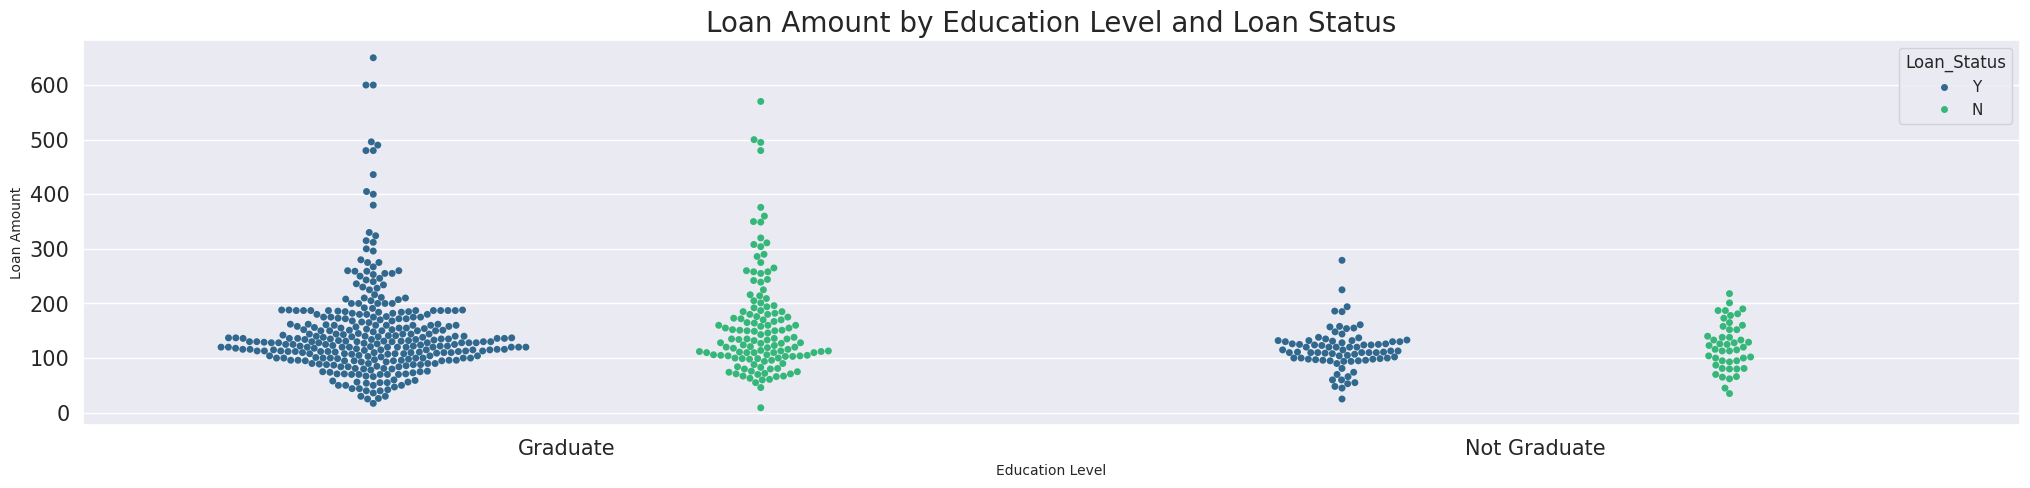

In [199]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.swarmplot(data=loan, x="Education", y="LoanAmount", hue="Loan_Status", palette="viridis", dodge=True, ax=axes)

plt.tick_params(labelsize=15)
plt.title("Loan Amount by Education Level and Loan Status", fontsize=20)
plt.xlabel("Education Level", fontsize=10)
plt.ylabel("Loan Amount", fontsize=10)

plt.show()

# **Feature Engineering**

In [200]:
label_encoder = preprocessing.LabelEncoder()
obj = (loan.dtypes == 'object')
for col in list(obj[obj].index):
  loan[col] = label_encoder.fit_transform(loan[col])

In [201]:
obj = (loan.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


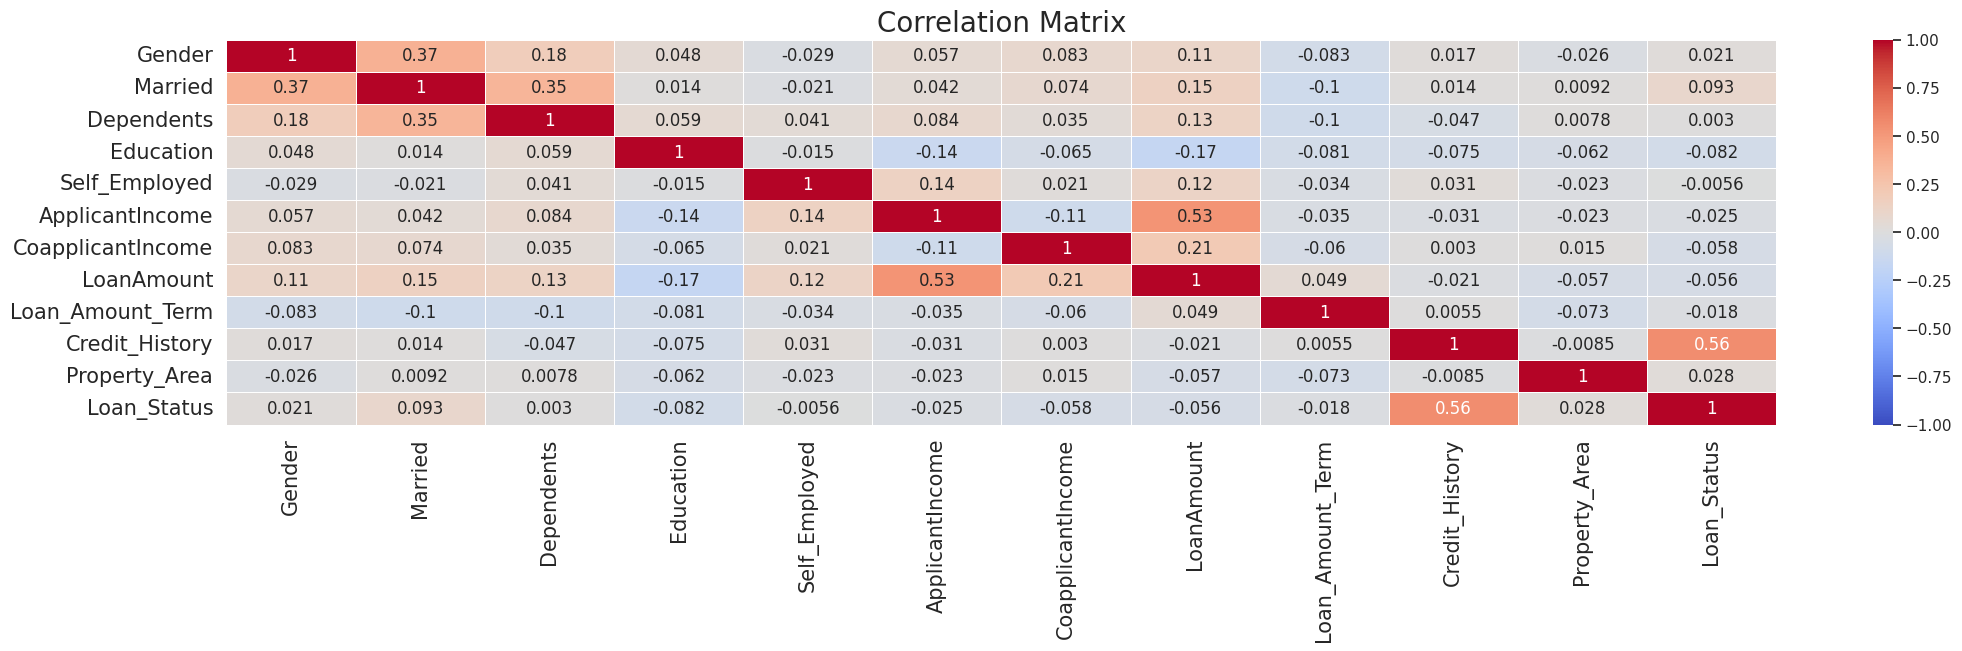

In [202]:
corr_matrix = loan.corr()

sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1)

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes, vmin=-1, vmax=1)

plt.tick_params(labelsize=15)
plt.title("Correlation Matrix", fontsize=20)

plt.show()

In [203]:
for col in loan.columns:
  loan[col] = loan[col].fillna(loan[col].mean())

loan.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# **Model Training**

In [204]:
from sklearn.model_selection import train_test_split

X = loan.drop(['Loan_Status'],axis=1)
Y = loan['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [205]:
# Dictionaries to store evaluation results
model_train_evaluation = {}
model_test_evaluation = {}

In [206]:
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)

rfc.fit(X_train, Y_train)

Y_train_pred = rfc.predict(X_train)
Y_test_pred = rfc.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
mae_train = mean_absolute_error(Y_train, Y_train_pred)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
mae_test = mean_absolute_error(Y_test, Y_test_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

train_result = {
    "Train Accuracy": 100 * train_accuracy,
    "Train RMSE": rmse_train,
    "Train MAE": mae_train
}

test_result = {
    "Test Accuracy": 100 * test_accuracy,
    "Test RMSE": rmse_test,
    "Test MAE": mae_test
}

model_train_evaluation["Random Forest"] = train_result
model_test_evaluation["Random Forest"] = test_result


In [207]:
print("Train Evaluation Results for Random Forest:")
print(model_train_evaluation["Random Forest"])

print("Test Evaluation Results for Random Forest:")
print(model_test_evaluation["Random Forest"])

Train Evaluation Results for Random Forest:
{'Train Accuracy': 98.04469273743017, 'Train RMSE': np.float64(0.13983230179646736), 'Train MAE': 0.019553072625698324}
Test Evaluation Results for Random Forest:
{'Test Accuracy': 82.5, 'Test RMSE': np.float64(0.4183300132670378), 'Test MAE': 0.175}


In [208]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
mae_train = mean_absolute_error(Y_train, Y_train_pred)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
mae_test = mean_absolute_error(Y_test, Y_test_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

train_result = {
    "Train Accuracy": 100 * train_accuracy,
    "Train RMSE": rmse_train,
    "Train MAE": mae_train
}

test_result = {
    "Test Accuracy": 100 * test_accuracy,
    "Test RMSE": rmse_test,
    "Test MAE": mae_test
}

model_train_evaluation["K-Nearest Neighbors"] = train_result
model_test_evaluation["K-Nearest Neighbors"] = test_result

In [209]:
print("Train Evaluation Results for Random Forest:")
print(model_train_evaluation["K-Nearest Neighbors"])

print("Test Evaluation Results for Random Forest:")
print(model_test_evaluation["K-Nearest Neighbors"])

Train Evaluation Results for Random Forest:
{'Train Accuracy': 78.49162011173185, 'Train RMSE': np.float64(0.4637712786306215), 'Train MAE': 0.21508379888268156}
Test Evaluation Results for Random Forest:
{'Test Accuracy': 63.74999999999999, 'Test RMSE': np.float64(0.6020797289396148), 'Test MAE': 0.3625}


In [210]:
svc = SVC()
svc.fit(X_train, Y_train)

Y_train_pred = svc.predict(X_train)
Y_test_pred = svc.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
mae_train = mean_absolute_error(Y_train, Y_train_pred)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
mae_test = mean_absolute_error(Y_test, Y_test_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

train_result = {
    "Train Accuracy": 100 * train_accuracy,
    "Train RMSE": rmse_train,
    "Train MAE": mae_train
}

test_result = {
    "Test Accuracy": 100 * test_accuracy,
    "Test RMSE": rmse_test,
    "Test MAE": mae_test
}

model_train_evaluation["Support Vector Classifier"] = train_result
model_test_evaluation["Support Vector Classifier"] = test_result

In [211]:
print("Train Evaluation Results for Random Forest:")
print(model_train_evaluation["Support Vector Classifier"])

print("Test Evaluation Results for Random Forest:")
print(model_test_evaluation["Support Vector Classifier"])

Train Evaluation Results for Random Forest:
{'Train Accuracy': 68.71508379888269, 'Train RMSE': np.float64(0.5593292071858694), 'Train MAE': 0.3128491620111732}
Test Evaluation Results for Random Forest:
{'Test Accuracy': 69.16666666666667, 'Test RMSE': np.float64(0.5552777082985894), 'Test MAE': 0.30833333333333335}


In [212]:
lc = LogisticRegression()
lc.fit(X_train, Y_train)

Y_train_pred = lc.predict(X_train)
Y_test_pred = lc.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
mae_train = mean_absolute_error(Y_train, Y_train_pred)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
mae_test = mean_absolute_error(Y_test, Y_test_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

train_result = {
    "Train Accuracy": 100 * train_accuracy,
    "Train RMSE": rmse_train,
    "Train MAE": mae_train
}

test_result = {
    "Test Accuracy": 100 * test_accuracy,
    "Test RMSE": rmse_test,
    "Test MAE": mae_test
}

model_train_evaluation["Logistic Regression"] = train_result
model_test_evaluation["Logistic Regression"] = test_result

In [213]:
print("Train Evaluation Results for Random Forest:")
print(model_train_evaluation["Logistic Regression"])

print("Test Evaluation Results for Random Forest:")
print(model_test_evaluation["Logistic Regression"])

Train Evaluation Results for Random Forest:
{'Train Accuracy': 79.60893854748603, 'Train RMSE': np.float64(0.4515646293999782), 'Train MAE': 0.20391061452513967}
Test Evaluation Results for Random Forest:
{'Test Accuracy': 80.83333333333333, 'Test RMSE': np.float64(0.43779751788545657), 'Test MAE': 0.19166666666666668}


# **Model Evauation**

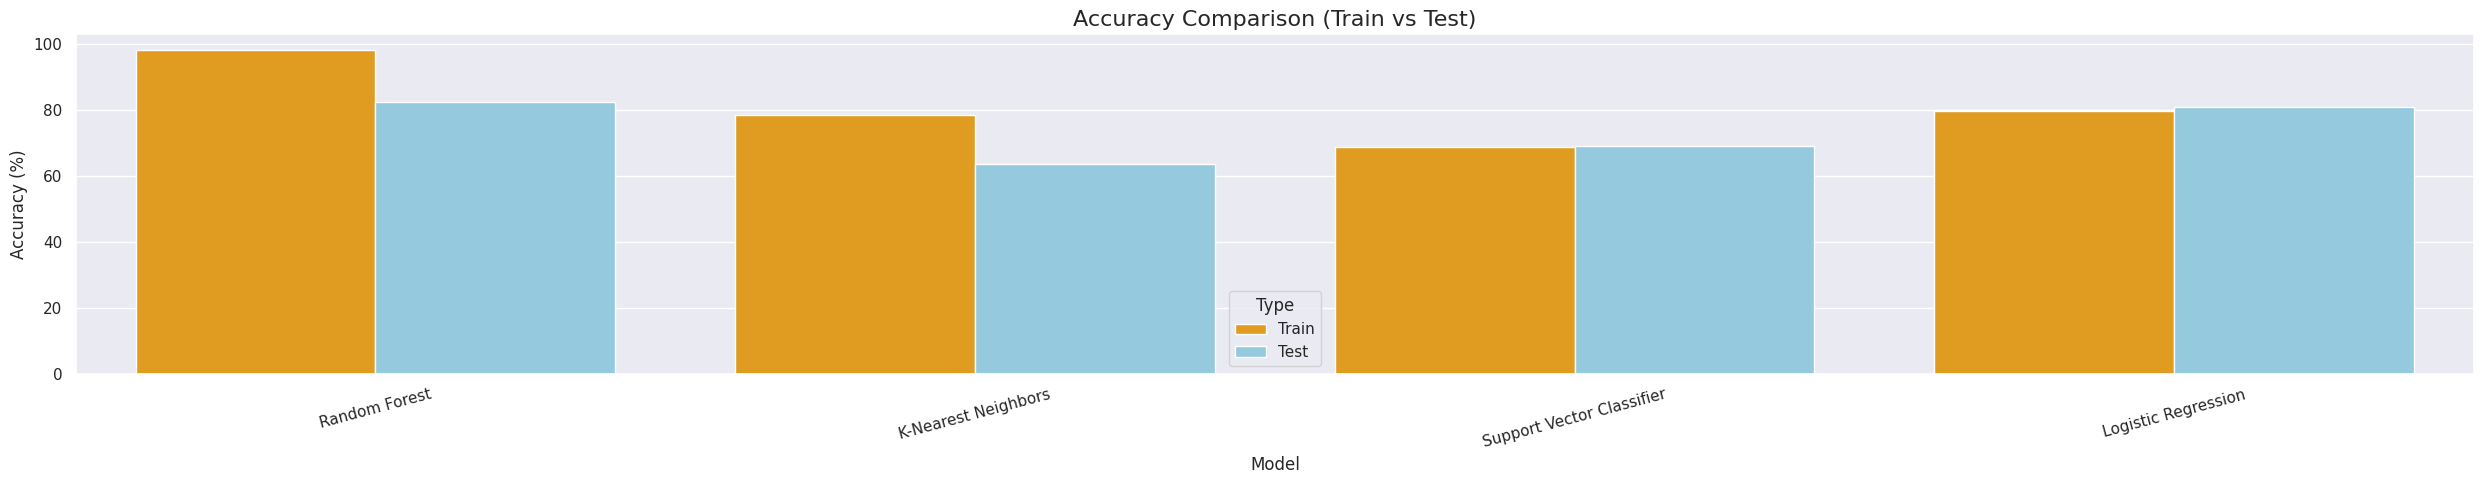

In [214]:
sns.set(style="darkgrid")

acc_scores_combined = []
for model in model_train_evaluation:
    acc_scores_combined.append({"Model": model, "Type": "Train", "Accuracy": model_train_evaluation[model]["Train Accuracy"]})
    acc_scores_combined.append({"Model": model, "Type": "Test", "Accuracy": model_test_evaluation[model]["Test Accuracy"]})

acc_scores_df = pd.DataFrame(acc_scores_combined)

sns.barplot(x="Model", y="Accuracy", hue="Type", data=acc_scores_df, palette=["orange", "skyblue"])
plt.title("Accuracy Comparison (Train vs Test)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

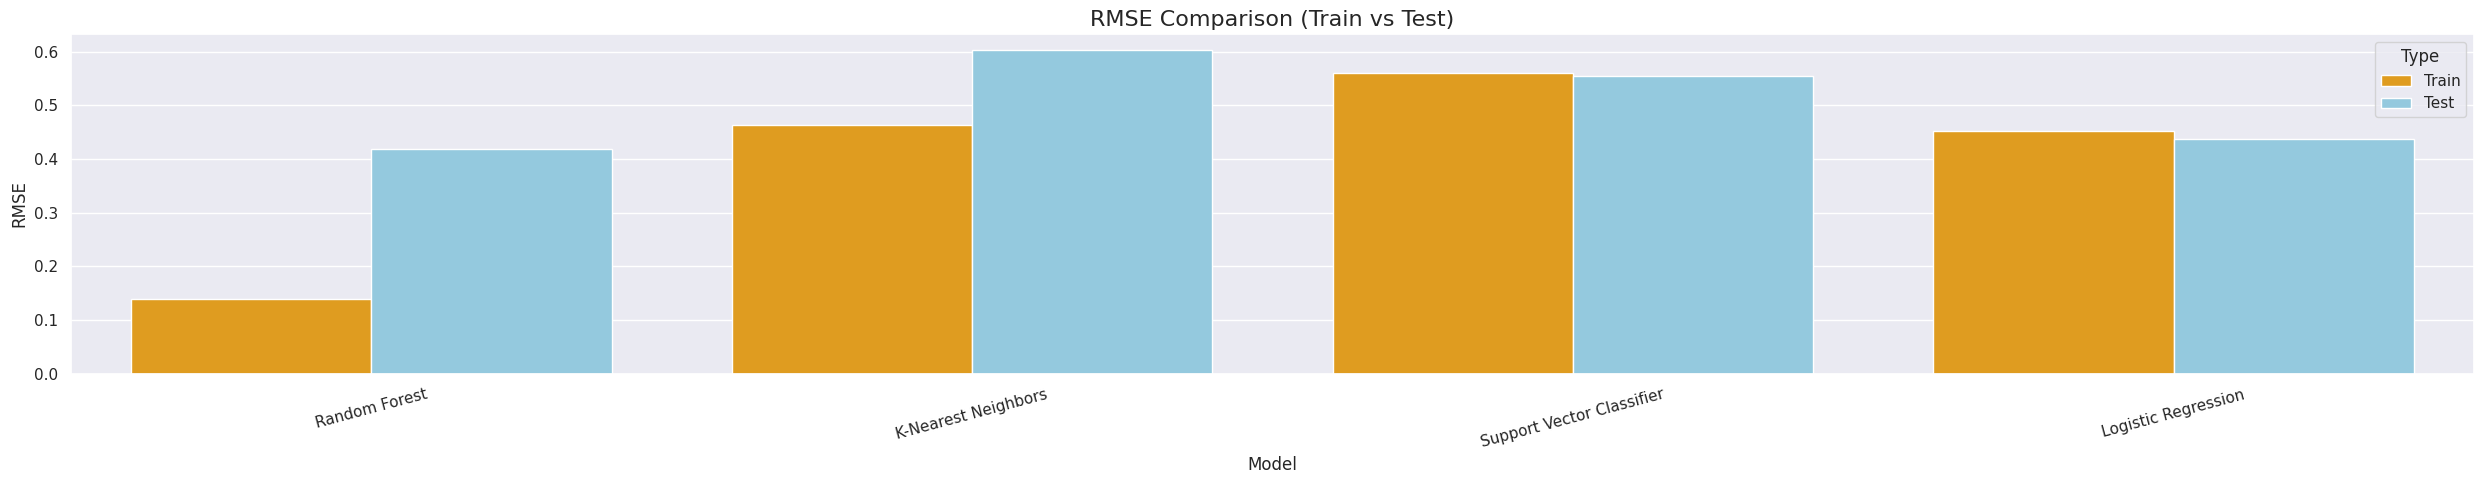

In [215]:
sns.set(style="darkgrid")

rmse_scores_combined = []
for model in model_train_evaluation:
    rmse_scores_combined.append({"Model": model, "Type": "Train", "RMSE": model_train_evaluation[model]["Train RMSE"]})
    rmse_scores_combined.append({"Model": model, "Type": "Test", "RMSE": model_test_evaluation[model]["Test RMSE"]})

rmse_scores_df = pd.DataFrame(rmse_scores_combined)

sns.barplot(x="Model", y="RMSE", hue="Type", data=rmse_scores_df, palette=["orange", "skyblue"])
plt.title("RMSE Comparison (Train vs Test)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

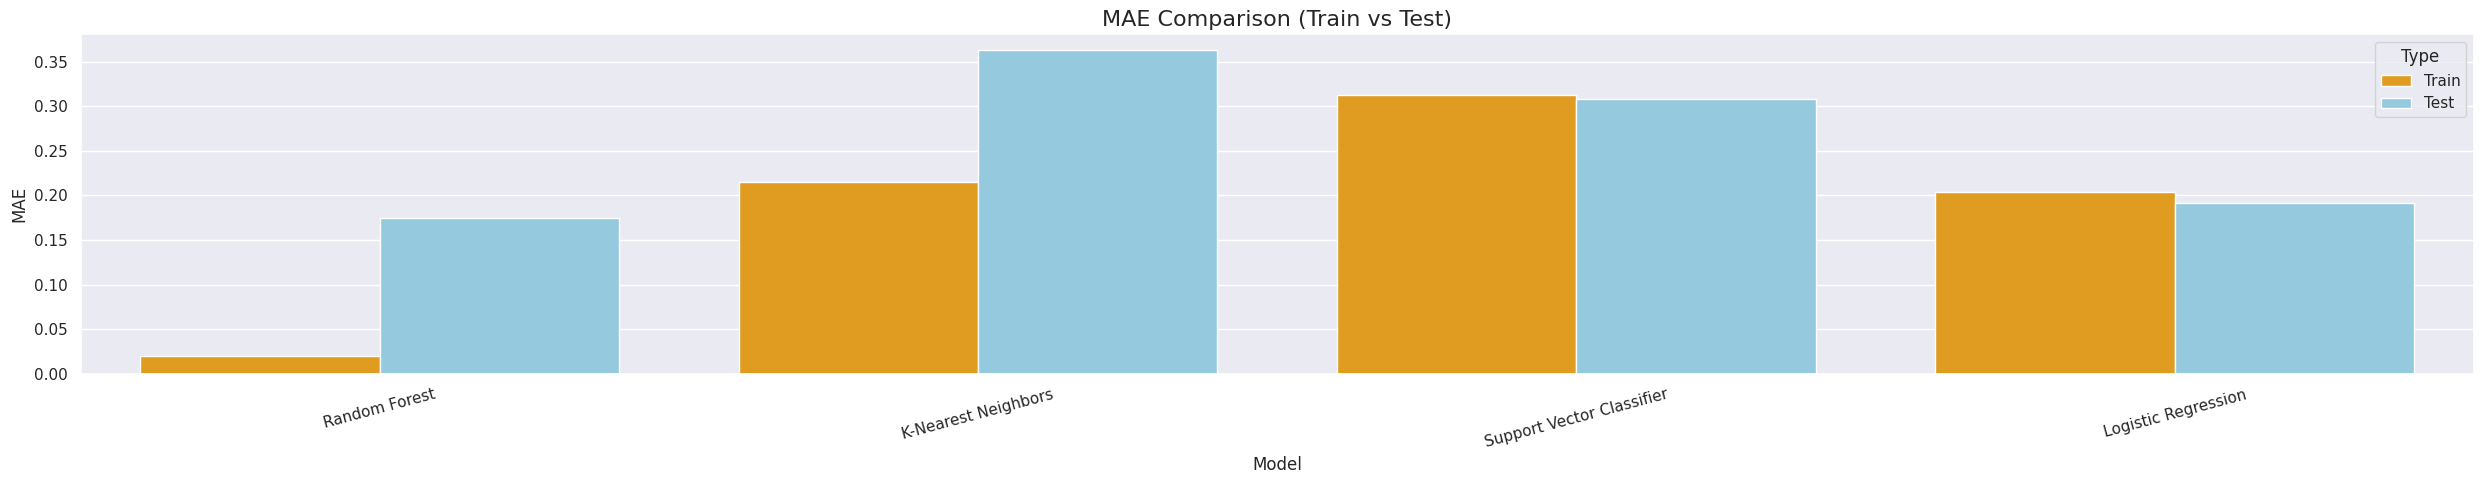

In [216]:
sns.set(style="darkgrid")

mae_scores_combined = []
for model in model_train_evaluation:
    mae_scores_combined.append({"Model": model, "Type": "Train", "MAE": model_train_evaluation[model]["Train MAE"]})
    mae_scores_combined.append({"Model": model, "Type": "Test", "MAE": model_test_evaluation[model]["Test MAE"]})

mae_scores_df = pd.DataFrame(mae_scores_combined)

sns.barplot(x="Model", y="MAE", hue="Type", data=mae_scores_df, palette=["orange", "skyblue"])
plt.title("MAE Comparison (Train vs Test)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("MAE", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()